In [1]:
import pandas as pd



In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
#For each column, how many NaNs are there?
df.isna().sum()


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


# How many columns and rows are completely empty?

In [8]:
# Counts how many columns are completely empty
df.isna().all(axis=0).sum() #axis = 0 means column


np.int64(0)

In [14]:
#Counts how many rows are completely empty
df.isna().all(axis=1).sum() #axis = 1 means rows


np.int64(0)

In [9]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
#(df['col'] == 0).sum() To check local zero
(df['size'] == 0).sum()

np.int64(0)

In [12]:
(df['tip'] == 0).sum()

np.int64(0)

In [13]:
df['total_bill'].describe()

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


In [10]:
df['tip'].describe()


,tip
count,244.000000
mean,2.998279
std,1.383638
min,1.000000
25%,2.000000
50%,2.900000
75%,3.562500
max,10.000000


In [8]:
df.groupby('time')['tip'].mean()


,tip
time,
Dinner,3.102670
Lunch,2.728088


In [3]:
df.groupby('day')['tip'].mean()


,tip
day,
Fri,2.734737
Sat,2.993103
Sun,3.255132
Thur,2.771452


In [14]:
df['day'].unique()


array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
day_size = df.groupby('day')['size'].mean()
day_tb = df.groupby('day')['total_bill'].mean()
day_tip = df.groupby('day')['tip'].mean()
#(day_size, day_tb, day_tip)

In [22]:
group_by_day = pd.DataFrame({
    'avg_size': df.groupby('day')['size'].mean(),
    'avg_total_bill': df.groupby('day')['total_bill'].mean(),
    'avg_tip': df.groupby('day')['tip'].mean()
})


In [23]:
group_by_day

,avg_size,avg_total_bill,avg_tip
day,,,
Fri,2.105263,17.151579,2.734737
Sat,2.517241,20.441379,2.993103
Sun,2.842105,21.410000,3.255132
Thur,2.451613,17.682742,2.771452


In [15]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [16]:
df.groupby('size')['tip'].mean()


,tip
size,
1,1.437500
2,2.582308
3,3.393158
4,4.135405
5,4.028000
6,5.225000


In [24]:
df[['tip','size']].dtypes

,0
tip,float64
size,int64


In [28]:
pd.api.types.is_numeric_dtype(df['tip'])


True

Step 1 — Create “tip per person”

In [29]:
df['tip_per_person'] = df['tip'] / df['size']


Step 2 — Check the new column exists

In [31]:
df[['tip', 'size', 'tip_per_person']].head()


,tip,size,tip_per_person
0,1.01,2,0.505000
1,1.66,3,0.553333
2,3.50,3,1.166667
3,3.31,2,1.655000
4,3.61,4,0.902500


In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500


Step 3 — Summarize tip per person

In [33]:
df['tip_per_person'].describe()

,tip_per_person
count,244.000000
mean,1.212762
std,0.491705
min,0.400000
25%,0.862500
50%,1.107500
75%,1.500000
max,3.333333


In [34]:
group_by_day['avg_tip_per_person'] = df.groupby('day')['tip_per_person'].mean()


In [35]:
group_by_day

,avg_size,avg_total_bill,avg_tip,avg_tip_per_person
day,,,,
Fri,2.105263,17.151579,2.734737,1.329342
Sat,2.517241,20.441379,2.993103,1.212692
Sun,2.842105,21.410000,3.255132,1.213022
Thur,2.451613,17.682742,2.771452,1.176815


I analyzed restaurant data and showed that while Sundays generate the highest total revenue and tips due to larger groups, Fridays have the highest average tip per person.

✅ STEP 2 — Sort the table (make patterns clearer)

Let’s sort by avg_tip_per_person, highest first.

In [36]:
group_by_day.sort_values('avg_tip_per_person', ascending=False)


,avg_size,avg_total_bill,avg_tip,avg_tip_per_person
day,,,,
Fri,2.105263,17.151579,2.734737,1.329342
Sun,2.842105,21.410000,3.255132,1.213022
Sat,2.517241,20.441379,2.993103,1.212692
Thur,2.451613,17.682742,2.771452,1.176815


<Axes: title={'center': 'Average Tip per Person by Day'}, xlabel='day'>

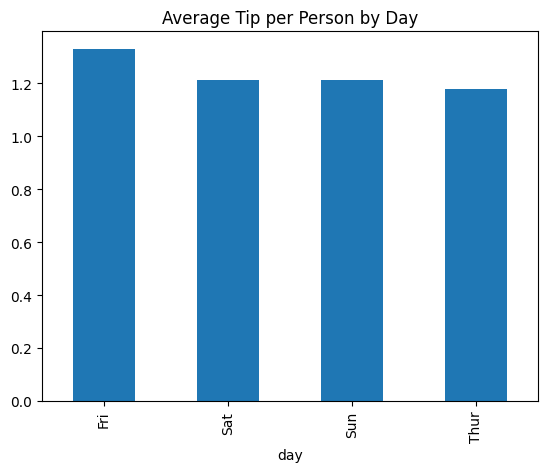

In [37]:
group_by_day['avg_tip_per_person'].plot(kind='bar', title='Average Tip per Person by Day')


<Axes: title={'center': 'Average Tip'}, xlabel='day'>

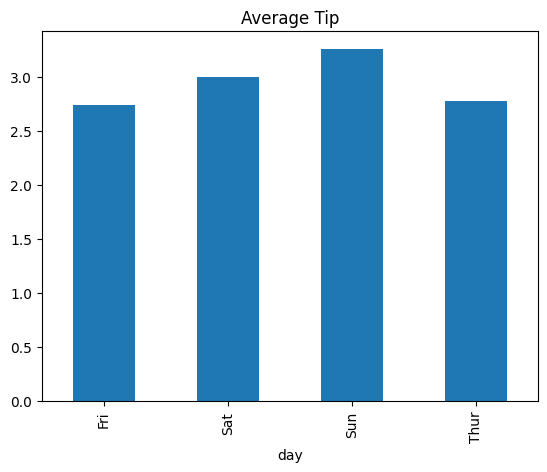

In [40]:
group_by_day['avg_tip'].plot(kind='bar', title='Average Tip')
